In [513]:
import pandas as pd
import scipy as sc
from scipy.sparse import csc_matrix
import numpy as np
from numpy import mean
import sklearn as sk
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

In [514]:
#reading the training file 
train_data = open('1664296410_9100718_train.txt', 'r')
eachLine = train_data.readlines()
count=0
#we use a list to store the labels
labelList = []
columnListTrain = []
for line in eachLine:
    newListTrain = line.split("\t")
    #newList will contain each line split into two:
    #the first index will be the class labels and second index will be the next set of values
    labelList.append(newListTrain[0])
    #we append the labels to new list
    columnListTrain.append(newListTrain[1])
while count<10:
    print(columnListTrain[count])
    count+=1
# print(len(eachLine))

96 183 367 379 387 1041 1117 1176 1327 1546 1862 2068 2357 2369 2389 2904 3171 3172 3221 3269 3341 3596 3794 3832 3888 3892 4093 4128 4143 4265 4319 4436 4782 5002 5060 5203 5296 5710 5783 5841 6163 6356 6499 6950 7221 7286 7411 7510 7539 7626 7788 7904 7982 8057 9007 9188 9350 9427 9589 9680 9700 9873 9900 9953 10118 10141 10276 10295 10469 10489 10506 10575 10690 10880 10944 11599 11835 12138 12208 12335 12533 12535 12786 12836 12907 12930 12956 13028 13161 13611 13650 13682 13985 14252 14256 14403 14435 14477 14621 14652 14941 15141 15170 15196 15422 15742 15867 15869 16021 16391 16465 16487 16628 16631 16643 16870 17077 17349 17389 17616 17717 17740 18175 18270 18357 18645 18770 18922 18960 18976 19102 19199 19449 19470 19671 19802 19943 19959 20244 20305 20342 20408 20549 20606 20967 21109 21144 21156 21209 21250 21578 21888 21896 21976 22205 22290 22298 22318 22368 22476 22565 22615 22662 22884 22898 22951 23068 23377 23384 23400 23507 23518 23596 23823 23918 24030 24103 24139 24

In [515]:
#reading the test file
count=0
test_data = open('1664296410_921989_test.txt','r')
eachLineTest = test_data.readlines()
columnListTest = []
#no need for labels
columnListTest = []
for line in eachLineTest:
    newListTest = line.split("\t")
    columnListTest.append(newListTest[0])
while count<10:
    print(columnListTest[count])
    count+=1

259 521 546 565 671 769 858 876 1056 1252 1392 1480 1584 1756 1952 1985 2027 2281 2299 2438 2526 2677 2730 2787 2790 3044 3262 3263 3355 3506 3511 3613 3635 3758 3877 3948 4061 4072 4131 4218 4301 4314 4335 4378 4438 4599 4627 4643 4803 4882 4910 5033 5156 5184 5336 5357 5407 5499 5535 5555 5617 5713 5795 5855 6021 6108 6147 6152 6159 6221 6288 6334 6338 6648 6816 6946 7023 7075 7154 7339 7383 7401 7511 7532 7598 7635 7742 7762 8011 8107 8429 9094 9131 9245 9267 9632 9775 9788 9803 9856 9857 9876 9935 9999 10081 10315 10418 10489 10599 10643 10690 10732 10772 10837 10885 10971 11001 11149 11159 11209 11213 11538 11561 11617 11666 11679 11869 11879 11894 12000 12264 12335 12343 12383 12515 12559 12561 12842 12866 12949 13145 13231 13488 13586 13623 13711 13785 13823 13872 13934 13976 14001 14125 14203 14215 14216 14364 14418 14648 14708 14866 14883 14998 15040 15099 15130 15201 15277 15306 15465 15512 15519 15623 15642 15668 15684 15911 16012 16111 16181 16274 16292 16398 16548 16615 16

In [516]:
#now we define a function to convert the columnList(columnListTrain/columnListTest) into individual data points to build our CSR matrix
def dataPts(columnList):
    count=0;
    columnData=[]
    row=[]
    r=0
    for eachRow in columnList:
        eachRow = eachRow.replace(" \n","")
        singleDatapoints = eachRow.split(" ")
        for j in singleDatapoints:
                columnData.append(int(j)-1)
                row.append(r)
        r+=1
    while count<=10:
        #print(columnData[count])
        #print(row[count])
        count+=1
    return(columnData,row)


In [517]:
#creating csr Matrix for training data
columnDataTrain,rowTrain = dataPts(columnListTrain)
data=[1]*len(rowTrain)
spMatrixTrain = csc_matrix((data, (rowTrain, columnDataTrain)),
                          shape = (max(rowTrain)+1,max(columnDataTrain)+1)).toarray()

#creating csr Matrix for testing data
columnDataTest,rowTest = dataPts(columnListTest)
data=[1]*len(rowTest)
spMatrixTest = csc_matrix((data, (rowTest, columnDataTest)),
                          shape = (max(rowTest)+1,max(columnDataTest)+1)).toarray()

In [518]:
#now creating the dataframe of training and testing data
df_TrainX=pd.DataFrame(spMatrixTrain)
df_TestX = pd.DataFrame(spMatrixTest)
print(df_TrainX)
print(df_TestX)

     0      1      2      3      4      5      6      7      8      9      \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
795      0      0      0      0      0      0      0      0      0      0   
796      0      0      0      0      0      0      0      0      0      0   
797      0      0      0      0      0      0      0      0      0      0   
798      0      0      0      0      0      0      0      0      0      0   
799      0      0      0      0      0      0      0      0      0      0   

     ...  99990  99991  99992  99993  99994  99995  99996  99997  99998  99

In [519]:
#normalizing the training data
norm_df_TrainX = normalize(df_TrainX)
#normalizing the test data
norm_df_TestX = normalize(df_TestX)

In [520]:
#reducing dimensionality for the sparse matrices
dimRed = TruncatedSVD(n_components=8,random_state=52)
Train_data_x = dimRed.fit_transform(norm_df_TrainX)
Test_data_x = dimRed.fit_transform(norm_df_TestX)
print(len(Train_data_x))
print(len(Test_data_x))
print(Train_data_x.shape[0])

800
350
800


In [521]:
print(len(labelList))
#trying to check if data is imbalanced
labelCount = Counter(labelList)
print(labelCount)
#as we see data is imbalanced

800
Counter({'0': 722, '1': 78})


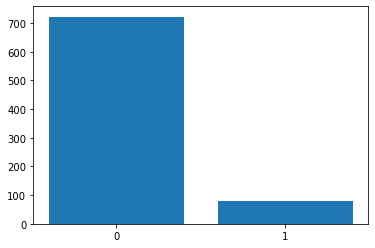

In [522]:
import matplotlib.pyplot as plt
x= np.array(["0","1"])
y= np.array([722,78])
#visualizing the imbalance in the data
plt.bar(x,y)
plt.show()

In [523]:
#converting the Train data into train and test split
Train_data_x_Split, Test_data_x_split, Train_data_y_split, Test_data_y_split = train_test_split(Train_data_x, labelList, test_size=0.30)

In [501]:
#Now we try to evaluate decision tree classifier on K-folds of the data
model_1 = DecisionTreeClassifier(class_weight={"1": 5,"0":1})
n_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
#we now display the performance
F1_score_1 = cross_val_score(model_1, Train_data_x, labelList, scoring="f1_micro", cv=n_fold, n_jobs=-1)
print('F1_score_1: %.3f' % mean(F1_score_1))

F1_score_1: 0.917


In [502]:
# #Now we try to evaluate the decision tree classifier by predicting for the test data
# model_1 = model_1.fit(Train_data_x, labelList)
# predictionValues_1 = model_1.predict(Test_data_x)
# print(predictionValues_1)
# print(Counter(predictionValues_1))

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0

In [524]:
#now we try to use neural networks perceptron to evaluate on k-folds of data
model_2 = Perceptron(class_weight={"1": 7.7,"0":1})
n_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# we now display the performance
F1_score_1 = cross_val_score(model_2, Train_data_x, labelList, scoring="f1_micro", cv=n_fold, n_jobs=-1)
print('F1_score_1: %.3f' % mean(F1_score_1))

F1_score_1: 0.790


In [525]:
# Now we try to evaluate the decision tree classifier by predicting for the test data
model_2 = model_2.fit(Train_data_x, labelList)
predictionValues_2 = model_2.predict(Test_data_x)
print(predictionValues_2)
print(Counter(predictionValues_2))

['1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

In [526]:
# Writing the result to the file
evaluationResult = open("ResultFilePercept09.txt", "w")
evaluationResult.writelines("%s\n" % value for value in predictionValues_2)
evaluationResult.close()